# Did National Happiness Levels Impact COVID-19 Mortality Rates?

In [4]:
# Import Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## File Handling

In [5]:
# Load csv panel data file
file_path_panel = os.path.join("..", "Resources", "DataPanel.csv")

# Read panel csv and store as pandas df
panel_df = pd.read_csv(file_path_panel)

# Preview panel df
panel_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
# Load csv mortality data file
file_path_mort = os.path.join("..", "Resources", "MortalityData.csv")

# Read panel csv and store as pandas df
mort_df = pd.read_csv(file_path_mort)

# Preview panel df
mort_df.head()

,Country name,Population 2020,Population 2019,"COVID-19 deaths per 100,000 population in 2020",Median age,Island,Index of exposure to COVID-19 infections in other countries as of March 31,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,United States,331002647.0,328239523.0,104.451,38.3,0,1.688,9.315,0,0,0.250,47.51,2810927.0,2839076.0,2852747.0,3424996.0,179.22
1,Egypt,102334403.0,100388073.0,7.457,25.3,0,1.627,9.007,0,0,0.446,31.56,NaN,NaN,NaN,NaN,NaN
2,Morocco,36910558.0,36471769.0,20.016,29.6,0,2.336,9.226,0,0,0.397,39.55,NaN,NaN,NaN,NaN,NaN
3,Lebanon,6825442.0,6855713.0,21.508,31.1,0,1.891,8.956,0,0,0.107,31.83,NaN,NaN,NaN,NaN,NaN
4,Saudi Arabia,34813867.0,34268528.0,17.875,31.9,0,1.250,8.897,0,0,0.651,45.90,NaN,NaN,NaN,NaN,NaN


In [10]:
# Create filtered df from panel_df to pull 2019 records (pre-pandemic)
panel_2019_df = panel_df.loc[panel_df.year == 2019, :]

# Add 2019 prefix to column names to better identify after merge
panel_2019_df = panel_2019_df.add_prefix('2019 ')

# Remove 2019 prefix from country name column for merge
panel_2019_df = panel_2019_df.rename(columns={'2019 Country name': 'Country name'})

# View filtered df
panel_2019_df

,Country name,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,2019 Negative affect
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274
32,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215
50,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319
65,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430
...,...,...,...,...,...,...,...,...,...,...,...
1892,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,0.351
1907,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186
1919,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,0.213
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394


In [11]:
# Merge panel df with mortality df
merge_df = pd.merge(panel_2019_df, mort_df, how='left', on='Country name')

# Preview merged df
merge_df

,Country name,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,...,Log of average distance to SARS countries,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2017","All-cause death count, 2018","All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,...,8.623,0.0,0.0,0.046,31.000,NaN,NaN,NaN,NaN,NaN
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,...,9.036,0.0,0.0,0.150,28.960,NaN,NaN,NaN,NaN,NaN
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,...,9.159,0.0,0.0,0.415,27.620,NaN,NaN,NaN,NaN,NaN
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,...,9.717,0.0,0.0,0.091,39.600,NaN,NaN,NaN,NaN,NaN
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,...,8.858,0.0,0.0,0.174,33.620,27367.0,25645.0,26252.0,35371.0,302.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,...,9.564,0.0,0.0,0.120,37.800,NaN,NaN,NaN,NaN,NaN
140,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,...,8.108,1.0,0.0,0.490,40.100,NaN,NaN,NaN,NaN,NaN
141,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,...,8.966,0.0,0.0,0.267,36.710,NaN,NaN,NaN,NaN,NaN
142,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,...,9.251,0.0,0.0,0.322,57.140,NaN,NaN,NaN,NaN,NaN


In [12]:
# Export merged df for easier viewing
# Create export file path for merged df
output_merge_file_path = os.path.join("..", "Resources", "MergeData.csv")

# Export csv file
merge_df.to_csv(output_merge_file_path)

In [13]:
# Consolidate merged df to only include relevant columns
df = merge_df.iloc[:, np.r_[0:11, 13, 20:22, 26]]

# Preview df
df

,Country name,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,2019 Negative affect,"COVID-19 deaths per 100,000 population in 2020",Index of institutional trust,Gini coefficient of income,"Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924,0.351,0.502,5.628,0.046,31.000,NaN
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914,0.681,0.274,41.038,0.150,28.960,NaN
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741,0.585,0.215,6.285,0.415,27.620,NaN
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830,0.826,0.319,95.684,0.091,39.600,NaN
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583,0.598,0.430,95.268,0.174,33.620,302.304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Venezuela,2019,5.081,NaN,0.888,66.7,0.626,NaN,0.839,0.761,0.351,3.615,0.120,37.800,NaN
140,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,0.751,0.186,0.036,0.490,40.100,NaN
141,Yemen,2019,4.197,NaN,0.870,57.5,0.651,NaN,0.798,0.543,0.213,2.045,0.267,36.710,NaN
142,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832,0.743,0.394,2.110,0.322,57.140,NaN


## Exploring Data Relationships

### Correlations

In [14]:
# Run correlations between variables
df.corr()

,2019 year,2019 Life Ladder,2019 Log GDP per capita,2019 Social support,2019 Healthy life expectancy at birth,2019 Freedom to make life choices,2019 Generosity,2019 Perceptions of corruption,2019 Positive affect,2019 Negative affect,"COVID-19 deaths per 100,000 population in 2020",Index of institutional trust,Gini coefficient of income,"Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
2019 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019 Life Ladder,NaN,1.000000,0.752559,0.729498,0.762322,0.586030,0.030650,-0.424911,0.476810,-0.497805,0.411507,0.071742,-0.273732,-0.279741
2019 Log GDP per capita,NaN,0.752559,1.000000,0.760484,0.850274,0.413016,-0.183559,-0.346385,0.244877,-0.537490,0.487179,0.020130,-0.308974,-0.263087
2019 Social support,NaN,0.729498,0.760484,1.000000,0.679219,0.425266,-0.063704,-0.218599,0.347142,-0.693343,0.386299,-0.060195,-0.299992,-0.286012
2019 Healthy life expectancy at birth,NaN,0.762322,0.850274,0.679219,1.000000,0.459566,-0.156005,-0.363880,0.264581,-0.476146,0.505763,0.010260,-0.377777,-0.259519
2019 Freedom to make life choices,NaN,0.586030,0.413016,0.425266,0.459566,1.000000,0.165650,-0.419575,0.601147,-0.434621,0.114207,0.450330,-0.009091,-0.180461
2019 Generosity,NaN,0.030650,-0.183559,-0.063704,-0.156005,0.165650,1.000000,-0.206522,0.177855,0.029455,-0.269652,0.393049,-0.039671,-0.387291
2019 Perceptions of corruption,NaN,-0.424911,-0.346385,-0.218599,-0.363880,-0.419575,-0.206522,1.000000,-0.231782,0.284097,0.096862,-0.684115,0.213016,0.349555
2019 Positive affect,NaN,0.476810,0.244877,0.347142,0.264581,0.601147,0.177855,-0.231782,1.000000,-0.407342,0.028269,0.224482,0.156864,-0.268541
2019 Negative affect,NaN,-0.497805,-0.537490,-0.693343,-0.476146,-0.434621,0.029455,0.284097,-0.407342,1.000000,-0.103648,-0.119784,0.307828,0.450367


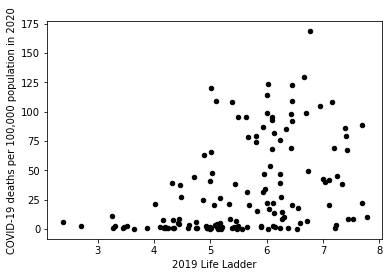

In [23]:
# Examine relationships via scatter plots
# Create scatter plot comparing the two stats
df.plot(kind='scatter',x='2019 Life Ladder',y='COVID-19 deaths per 100,000 population in 2020',color='black')

# Display the chart
plt.show()

### Removing Outliers

In [34]:
# Identify outlier ranges
# Pull death data columns into series
death_rate = df["COVID-19 deaths per 100,000 population in 2020"]
excess_deaths = df["Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"]

# Calculate IQR for death rate
quartiles_death_rate = death_rate.quantile([.25,.5,.75])
lowerq_rate = quartiles_death_rate[0.25]
upperq_rate = quartiles_death_rate[0.75]
iqr_rate = upperq_rate-lowerq_rate

# Calculate IQR for excess deaths
quartiles_excess_deaths = excess_deaths.quantile([.25,.5,.75])
lowerq_excess = quartiles_excess_deaths[0.25]
upperq_excess = quartiles_excess_deaths[0.75]
iqr_excess = upperq_excess-lowerq_excess

# Print stats
print(f"The lower quartile of COVID-19 death rates is: {lowerq_rate}")
print(f"The upper quartile of COVID-19 death rates is: {upperq_rate}")
print(f"The interquartile range of COVID-19 death rates is: {iqr_rate}")

print(f"The lower quartile of COVID-19 excess deaths is: {lowerq_excess}")
print(f"The upper quartile of COVID-19 excess deaths is: {upperq_excess}")
print(f"The interquartile range of COVID-19 excess deaths is: {iqr_excess}")

lower_bound_rate = lowerq_rate - (1.5*iqr_rate)
upper_bound_rate = upperq_rate + (1.5*iqr_rate)
print(f"Potential outliers for COVID-19 death rate below: {lower_bound_rate}")
print(f"Potential outliers for COVID-19 death rate above: {upper_bound_rate}")

lower_bound_excess = lowerq_excess - (1.5*iqr_excess)
upper_bound_excess = upperq_excess + (1.5*iqr_excess)
print(f"Potential outliers for COVID-19 excess deaths below: {lower_bound_excess}")
print(f"Potential outliers for COVID-19 excess deaths above: {upper_bound_excess}")

The lower quartile of COVID-19 death rates is: 1.7890000000000001
The upper quartile of COVID-19 death rates is: 53.558
The interquartile range of COVID-19 death rates is: 51.769
The lower quartile of COVID-19 excess deaths is: 44.117
The upper quartile of COVID-19 excess deaths is: 169.894
The interquartile range of COVID-19 excess deaths is: 125.77700000000002
Potential outliers for COVID-19 death rate below: -75.86449999999999
Potential outliers for COVID-19 death rate above: 131.2115
Potential outliers for COVID-19 excess deaths below: -144.54850000000002
Potential outliers for COVID-19 excess deaths above: 358.5595


In [40]:
# Create lists to hold outliers
death_rate_outliers = []
excess_deaths_outliers = []

# Iterate through df to find outliers in both COVID-19 deaths variables of interest
for index, row in df.iterrows():
    if row["COVID-19 deaths per 100,000 population in 2020"] > upper_bound_rate or row["COVID-19 deaths per 100,000 population in 2020"] < lower_bound_rate:
        death_rate_outliers.append(row["Country name"])
    if row["Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"] > upper_bound_excess or row["Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"] < lower_bound_excess:
        excess_deaths_outliers.append(row["Country name"])

# Print list of outlier countries
print(death_rate_outliers)
print(excess_deaths_outliers)

['Belgium']
[]


In [ ]:
# Remove COVID-19 death rate outlier (Belgium) from df for new corr matrix


(0.0, 350.0)

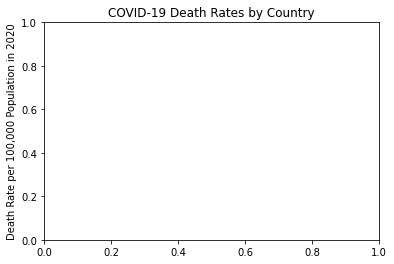

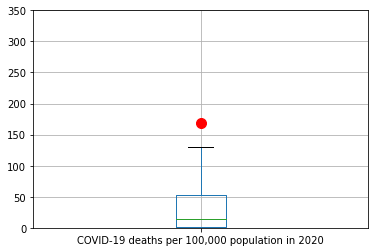

In [18]:
# Make box and whisker plot of COVID-19 death rates to identify outliers that may influence correlations
# Format the appearance of outlier circles on the plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  markeredgecolor='red')

# Create the graph
fig1, ax1 = plt.subplots()
plt.figure()
ax1.set_title('COVID-19 Death Rates by Country')
ax1.set_ylabel('Death Rate per 100,000 Population in 2020')

df.boxplot(["COVID-19 deaths per 100,000 population in 2020"], flierprops=flierprops)
plt.ylim(0, 350)

In [ ]:
# What may be the difference between death rate vs excess deaths that explains very different correlation coefficients?
# Remove outliers in death rate/excess deaths?
# Sort to see what types of countries had highest death rathes/excess deaths versus those with lowest?
# If developed countries had higher death rates generally, they also have higher quality of life indicators.
# So, maybe the COVID death rates were highly influenced by other factors like politics, which would make happiness factors mostly irrelevant.
# 
# Look at chapter 2 - similar issues examined.
# Could look at political variables.